Without Neuro Fuzzy

MSE: 7.507157355655732, R-squared: 0.8958088176219384
        A     B     C  A_normalized  B_normalized  C_shifted          D
0     7.8   9.0  13.6      0.242424      0.272727       11.4  13.416608
1     9.0  13.6  11.4      0.272727      0.388889        8.0  11.140908
2    13.6  11.4   8.0      0.388889      0.333333        6.0   7.768707
3    11.4   8.0   6.0      0.333333      0.247475        6.4   6.435149
4     8.0   6.0   6.4      0.247475      0.196970        7.8   7.273200
..    ...   ...   ...           ...           ...        ...        ...
329   8.6   7.8   7.8      0.262626      0.242424        7.2   8.032890
330   7.8   7.8   7.2      0.242424      0.242424        7.0   7.413359
331   7.8   7.2   7.0      0.242424      0.227273        8.2   7.335553
332   7.2   7.0   8.2      0.227273      0.222222        6.2   8.156332
333   7.0   8.2   6.2      0.222222      0.252525        6.8   6.241013

[334 rows x 7 columns]


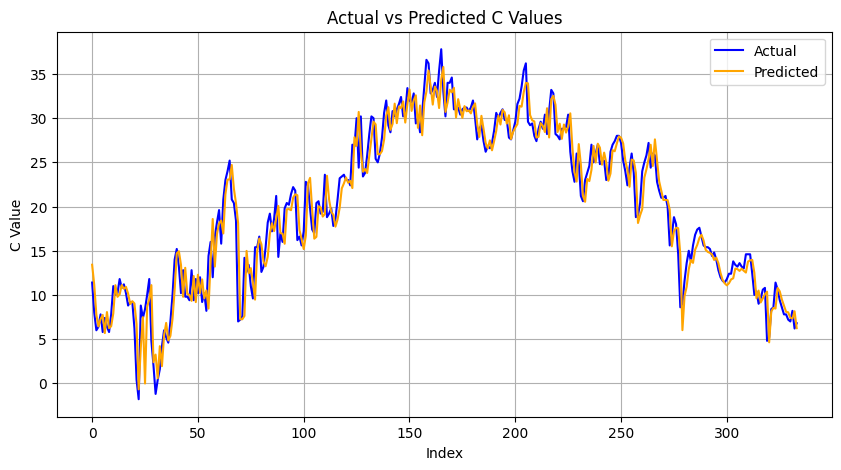

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

class TemperatureModel:
    def __init__(self):
        self.url = 'https://drive.google.com/uc?id=1kEOahkOFqGJHdwpp9TxZ8sSB9MmVun5d'
        self.file_path = 'Temperature Dataset.xlsx'

    def load_data(self):
        # Download and load the dataset
        gdown.download(self.url, self.file_path, quiet=True)
        data = pd.read_excel(self.file_path)
        data.columns = ['A', 'B', 'C']
        # Normalize columns A and B
        data['A_normalized'] = (data['A'] - data['A'].min()) / (data['A'].max() - data['A'].min())
        data['B_normalized'] = (data['B'] - data['B'].min()) / (data['B'].max() - data['B'].min())
        # Shift column C to create a prediction target
        data['C_shifted'] = data['C'].shift(-1)
        # Drop rows with missing values resulting from the shift
        data = data.dropna()
        return data

    def train_and_evaluate_model(self, data):
        # Setup data for modeling
        X = data[['A_normalized', 'B_normalized', 'C']]  # Features
        y = data['C_shifted']  # Target
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Apply polynomial features
        poly = PolynomialFeatures(degree=4)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train the linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        # Predict on the test data
        y_pred = model.predict(poly.transform(X))

        # Calculate and print performance metrics
        mse = mean_squared_error(y_test, model.predict(X_test_poly))
        r2 = r2_score(y_test, model.predict(X_test_poly))
        print(f'MSE: {mse}, R-squared: {r2}')

        return y_pred

    def display_results(self, data, predictions):
        # Append predictions to the dataframe as Column D
        data['D'] = predictions
        return data

    def plot_and_display(self, data):
        # Plotting actual vs predicted values using a line plot
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=data.index, y=data['C_shifted'], label='Actual', color='blue')
        sns.lineplot(x=data.index, y=data['D'], label='Predicted', color='orange')
        plt.title('Actual vs Predicted C Values')
        plt.xlabel('Index')
        plt.ylabel('C Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Styling DataFrame for display with improved visualization
        styled_table = data.style.set_properties(**{
            'background-color': 'black',
            'color': 'white',
            'border-color': 'gold'
        }).applymap(lambda x: f"color: {'red' if isinstance(x, float) and x < 0 else 'green'}").set_table_styles(
            [{'selector': 'th',
              'props': [('font-size', '12pt'), ('background-color', 'purple'), ('color', 'white'), ('border-style', 'solid'), ('border-width', '2px'), ('border-color', 'black')]}]
        ).bar(subset=['D', 'C_shifted'], color='#d65f5f')
        return styled_table

if __name__ == "__main__":
    model = TemperatureModel()
    data = model.load_data()
    predictions = model.train_and_evaluate_model(data)
    final_data = model.display_results(data, predictions)
    print(final_data)
    model.plot_and_display(final_data)


with fuzzy

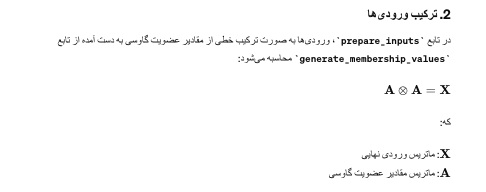

MSE: 9.407687706637033


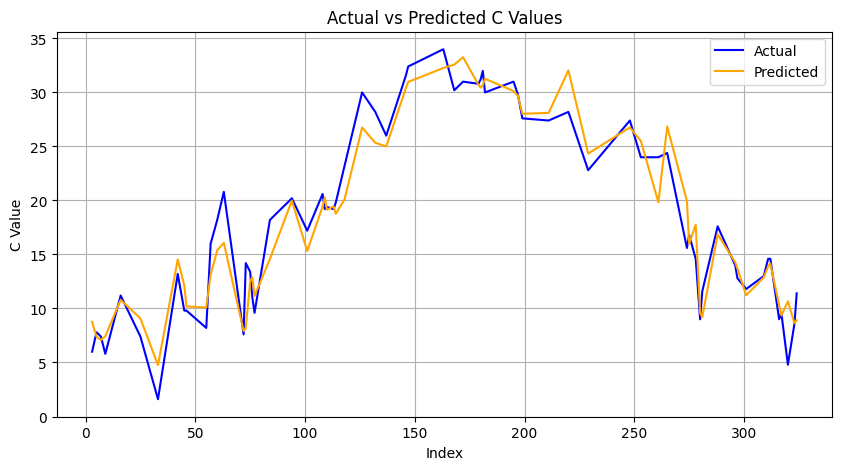

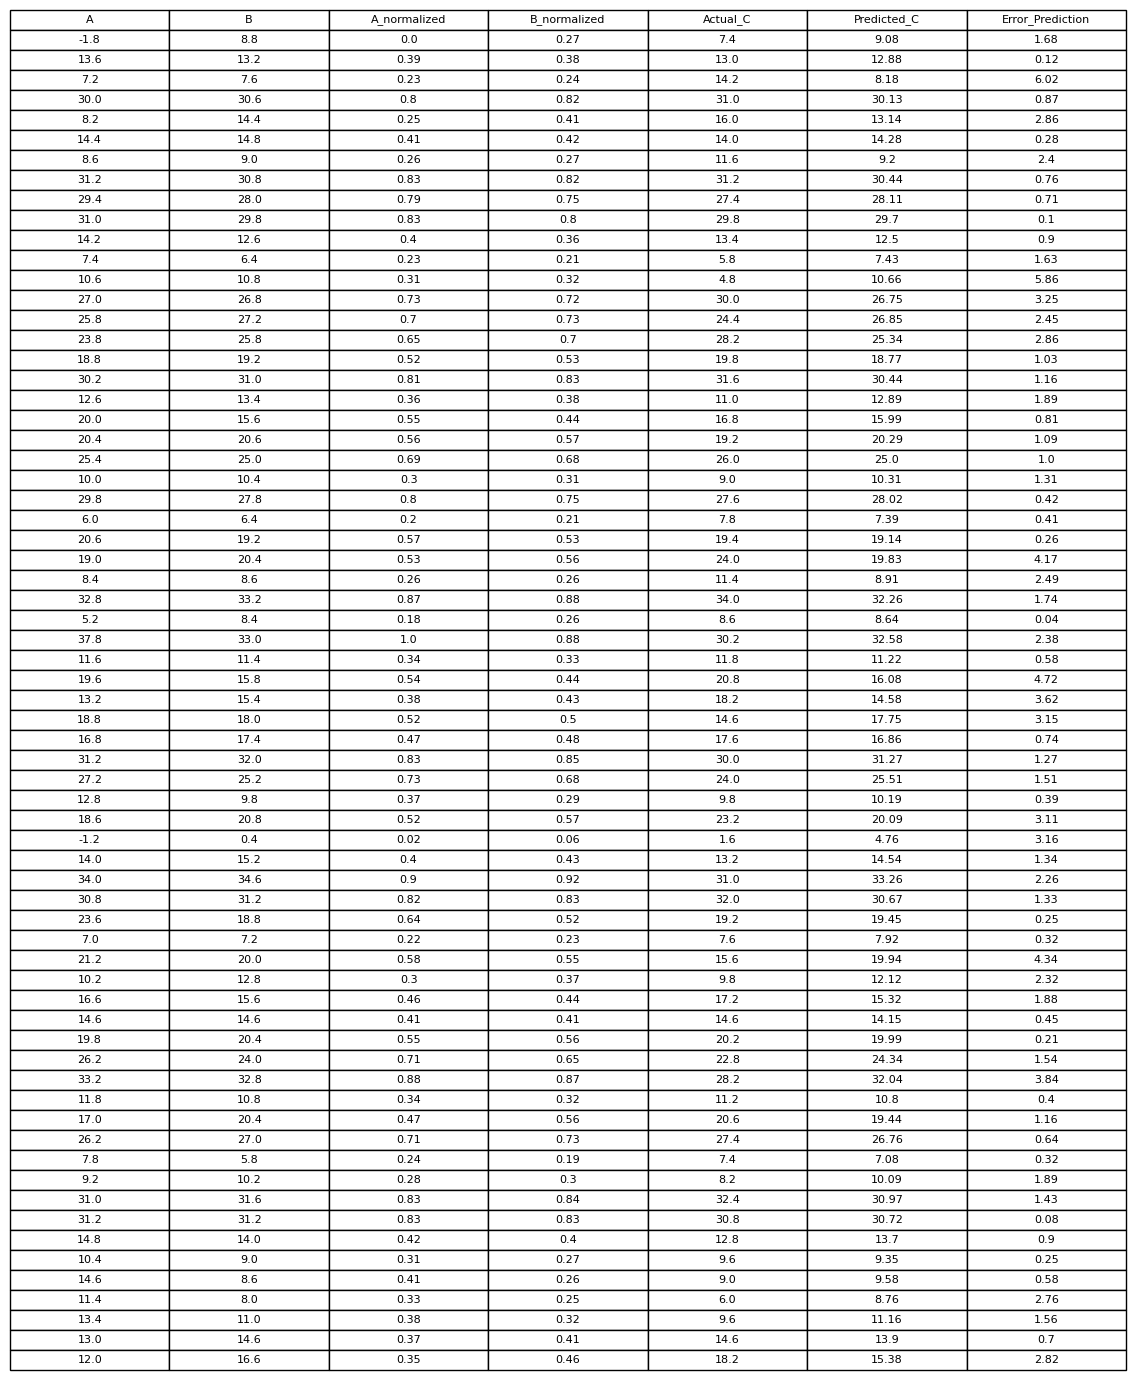

In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def generate_membership_values(data, num_points, sigma):
    """ Enhance the Gaussian-based membership functions. """
    values = np.linspace(data.min(), data.max(), num_points)
    return np.exp(-0.5 * ((data[:, np.newaxis] - values) ** 2) / sigma**2)

class TemperatureModel:
    def __init__(self):
        self.url = 'https://drive.google.com/uc?id=1kEOahkOFqGJHdwpp9TxZ8sSB9MmVun5d'
        self.file_path = 'Temperature Dataset.xlsx'

    def load_data(self):
        gdown.download(self.url, self.file_path, quiet=True)
        data = pd.read_excel(self.file_path)
        data.columns = ['A', 'B', 'C']
        data['A_normalized'] = (data['A'] - data['A'].min()) / (data['A'].max() - data['A'].min())
        data['B_normalized'] = (data['B'] - data['B'].min()) / (data['B'].max() - data['B'].min())
        data['C_shifted'] = data['C'].shift(-1)
        return data.dropna()

    def prepare_inputs(self, data):
        A_membership = generate_membership_values(data['A_normalized'].values, 7, sigma=0.9)
        B_membership = generate_membership_values(data['B_normalized'].values, 7, sigma=0.9)
        combined_inputs = np.einsum('ij,ik->ijk', A_membership, B_membership).reshape(len(data), -1)
        return combined_inputs, data

    def train_and_evaluate_model(self, data):
        inputs, data = self.prepare_inputs(data)
        X_train, X_test, y_train, y_test = train_test_split(inputs, data['C_shifted'], test_size=0.2, random_state=42)
        model = Ridge(alpha=0.5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'MSE: {mse}')
        return X_test, y_test, y_pred, data.iloc[y_test.index]

    def display_results(self, X_test, y_test, y_pred, data):
        data_test = pd.DataFrame({
            'A': data['A'],
            'B': data['B'],
            'A_normalized': data['A_normalized'].round(2),
            'B_normalized': data['B_normalized'].round(2),
            'Actual_C': data['C'].round(2),
            'Predicted_C': y_pred.round(2),
            'Error_Prediction': np.abs(data['C'] - y_pred).round(2)
        })

        plt.figure(figsize=(10, 5))
        sns.lineplot(data=data_test, x=data_test.index, y='Actual_C', label='Actual', color='blue')
        sns.lineplot(data=data_test, x=data_test.index, y='Predicted_C', label='Predicted', color='orange')
        plt.title('Actual vs Predicted C Values')
        plt.xlabel('Index')
        plt.ylabel('C Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display table
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('tight')
        ax.axis('off')
        the_table = ax.table(cellText=data_test.values, colLabels=data_test.columns, loc='center', cellLoc = 'center')
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(8)
        the_table.scale(1.2, 1.2)
        plt.show()

        return data_test

if __name__ == "__main__":
    model = TemperatureModel()
    data = model.load_data()
    X_test, y_test, y_pred, data_used = model.train_and_evaluate_model(data)
    styled_results = model.display_results(X_test, y_test, y_pred, data_used)


Train MSE: 9.440571521885825
Test MSE: 10.359154792143451


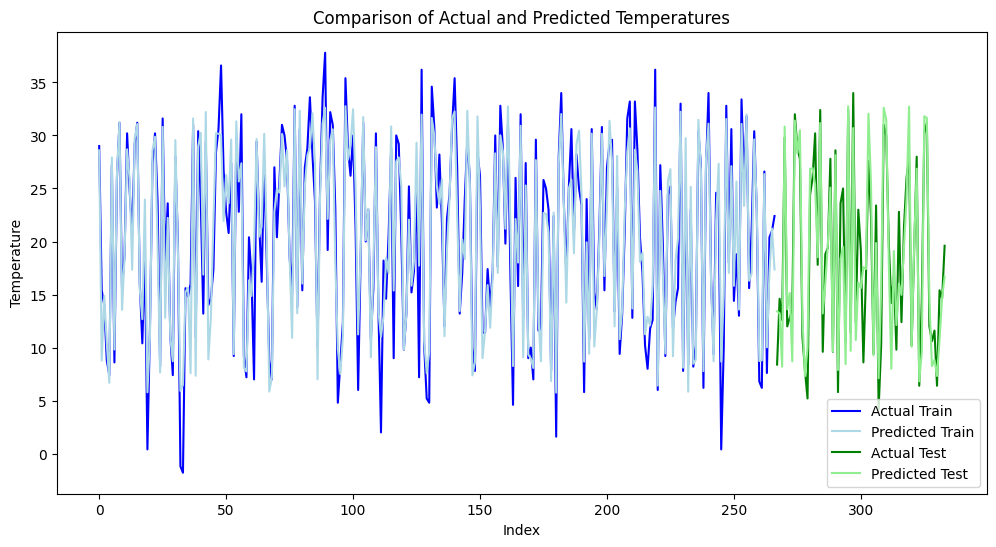

In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def generate_membership_values(data, num_points, sigma):
    """Enhance the Gaussian-based membership functions."""
    values = np.linspace(data.min(), data.max(), num_points)
    return np.exp(-0.5 * ((data[:, None] - values) ** 2) / sigma**2)

class TemperatureModel:
    def __init__(self):
        self.url = 'https://drive.google.com/uc?id=1kEOahkOFqGJHdwpp9TxZ8sSB9MmVun5d'
        self.file_path = 'Temperature Dataset.xlsx'

    def load_data(self):
        """Download and preprocess data."""
        gdown.download(self.url, self.file_path, quiet=True)
        data = pd.read_excel(self.file_path)
        data.columns = ['A', 'B', 'C']
        # Normalize the columns
        data['A_normalized'] = data['A'].sub(data['A'].min()).div(data['A'].max() - data['A'].min())
        data['B_normalized'] = data['B'].sub(data['B'].min()).div(data['B'].max() - data['B'].min())
        data['C_shifted'] = data['C'].shift(-1)
        return data.dropna()

    def prepare_inputs(self, data):
        """Prepare input features using membership values."""
        A_membership = generate_membership_values(data['A_normalized'].values, 7, sigma=0.1)
        B_membership = generate_membership_values(data['B_normalized'].values, 7, sigma=0.1)
        combined_inputs = np.einsum('ij,ik->ijk', A_membership, B_membership).reshape(len(data), -1)
        return combined_inputs, data['C_shifted']

    def train_and_evaluate_model(self, data):
        """Train Ridge regression model and evaluate its performance."""
        inputs, targets = self.prepare_inputs(data)
        X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
        model = Ridge(alpha=0.5)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f'Train MSE: {mse_train}')
        print(f'Test MSE: {mse_test}')
        return X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

    def plot_results(self, y_train, y_test, y_pred_train, y_pred_test):
        """Visualize the actual vs predicted values for both training and testing sets."""
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=np.arange(len(y_train)), y=y_train, label='Actual Train', color='blue')
        sns.lineplot(x=np.arange(len(y_train)), y=y_pred_train, label='Predicted Train', color='lightblue')
        sns.lineplot(x=np.arange(len(y_train), len(y_train) + len(y_test)), y=y_test, label='Actual Test', color='green')
        sns.lineplot(x=np.arange(len(y_train), len(y_train) + len(y_test)), y=y_pred_test, label='Predicted Test', color='lightgreen')
        plt.title('Comparison of Actual and Predicted Temperatures')
        plt.xlabel('Index')
        plt.ylabel('Temperature')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    model = TemperatureModel()
    data = model.load_data()
    X_train, X_test, y_train, y_test, y_pred_train, y_pred_test = model.train_and_evaluate_model(data)
    model.plot_results(y_train, y_test, y_pred_train, y_pred_test)
